Simple notebook done to test if the SCADA is receiving appropriate junction and pump/valve flowrate information

In [ ]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [12]:
def do_plot(series, legends, title, labels, xlim=None, ylim=None):
    plt.figure(figsize=(16, 2))    
    i = 0
    for serie in series:
        serie.plot(label=legends[i])        
        i = i+1
    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    if xlim and ylim:               
        plt.xlim(left=xlim[0], right=xlim[1])
    plt.legend()    
    plt.grid(True)  

In [4]:
folder = '2021_data/junction_test/week_0/'
physical_file = folder + 'physical_process.csv'
scada_file = folder + 'scada_values.csv' 
ground_truth = pd.read_csv(physical_file)
scada_information = pd.read_csv(scada_file)
scada_information = scada_information.drop('timestamp', axis=1)

In [5]:
len(scada_information.columns)

38

In [6]:
scada_information.columns

Index(['PU1', 'PU2', 'PU1F', 'PU2F', 'J280', 'J269', 'T1', 'T2', 'V2', 'J300',
       'J256', 'J289', 'J415', 'J14', 'J422', 'PU4', 'PU5', 'PU6', 'PU7',
       'PU4F', 'PU5F', 'PU6F', 'PU7F', 'T3', 'PU8', 'PU10', 'PU11', 'PU8F',
       'PU10F', 'PU11F', 'J302', 'J306', 'J307', 'J317', 'T4', 'T5', 'T6',
       'T7'],
      dtype='object')

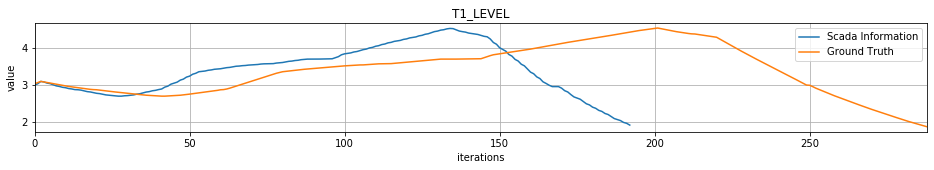

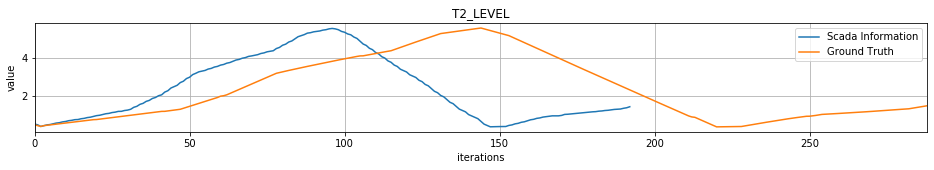

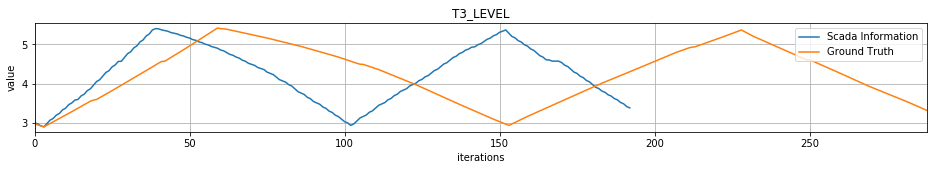

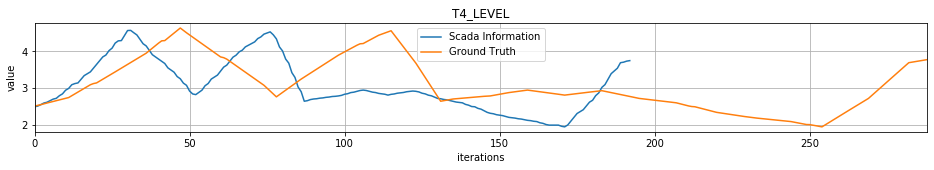

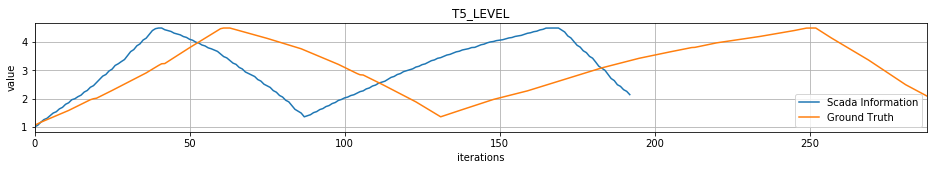

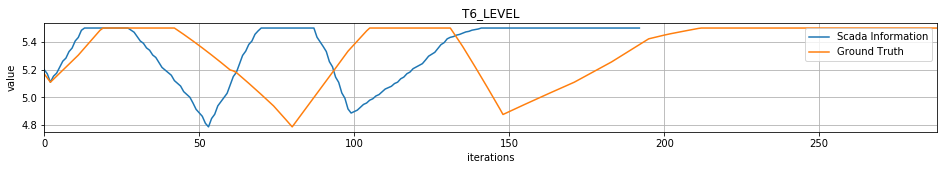

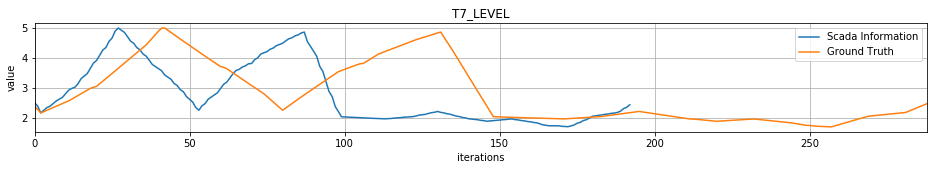

In [15]:
for column in scada_information.columns:    
    if column.startswith('T'):
        g_name = column+'_LEVEL'
    else:        
        continue
    do_plot([scada_information[column], ground_truth[g_name]],['Scada Information', 'Ground Truth'],g_name,['iterations', 'value'])

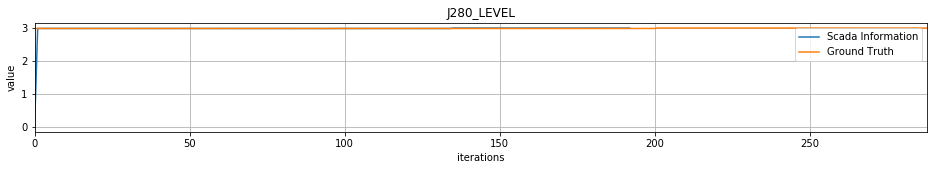

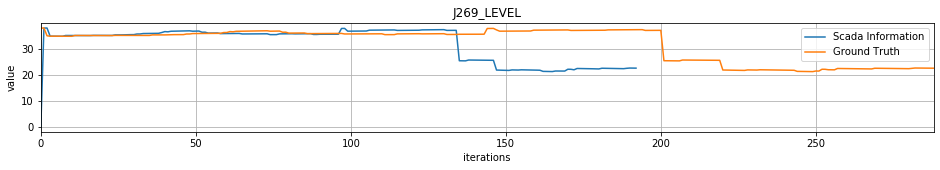

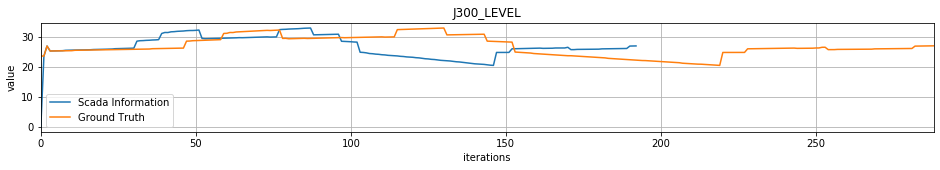

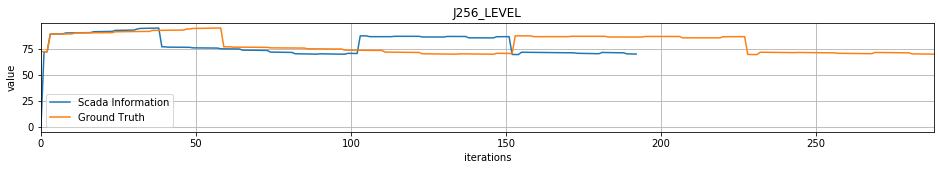

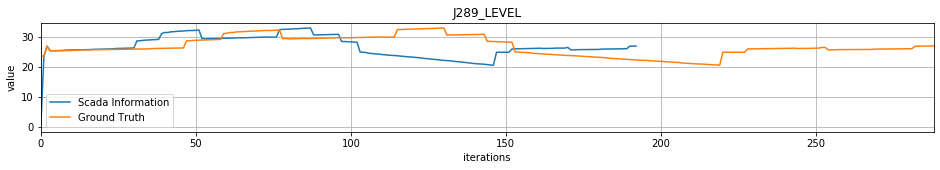

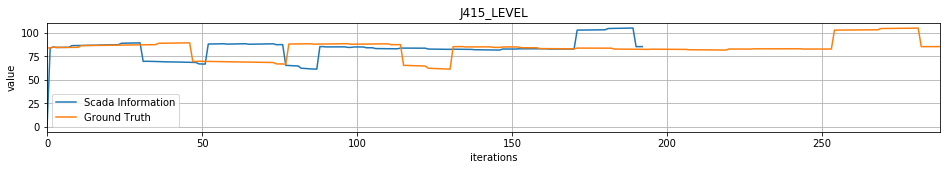

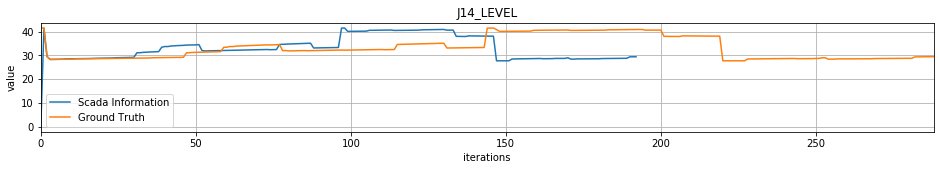

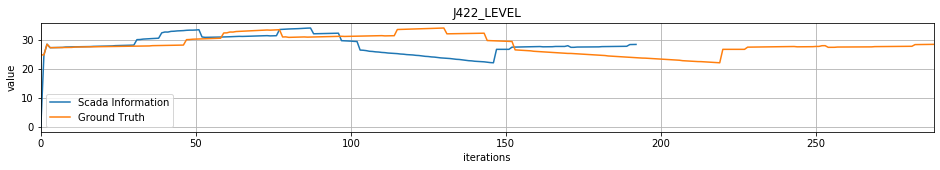

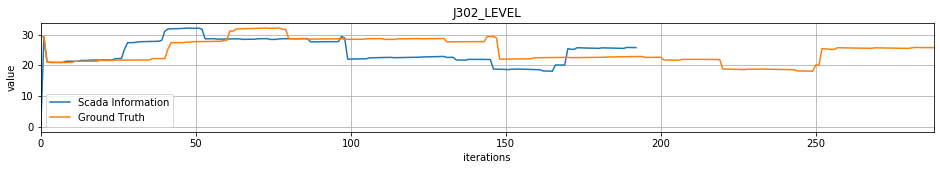

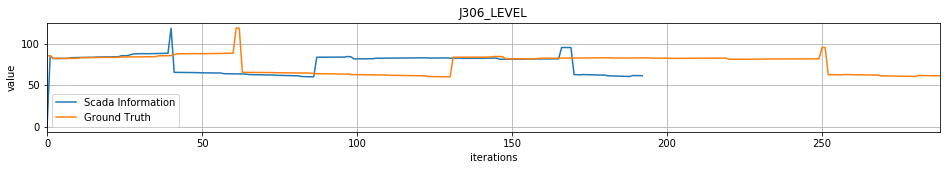

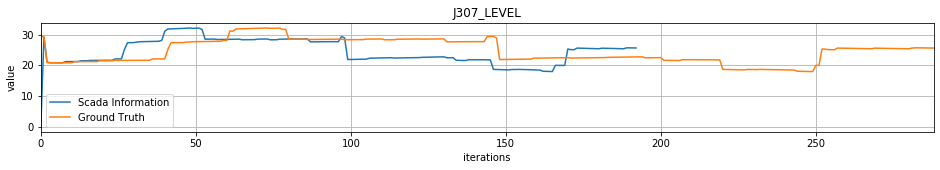

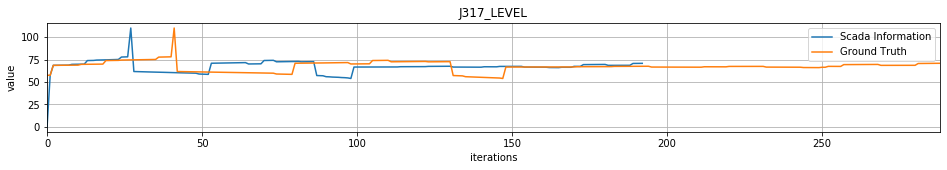

In [16]:
for column in scada_information.columns:
    if column.startswith('J'):
        g_name = column+'_LEVEL'
    else:        
        continue    
    do_plot([scada_information[column], ground_truth[g_name]],['Scada Information', 'Ground Truth'],g_name,['iterations', 'value'])

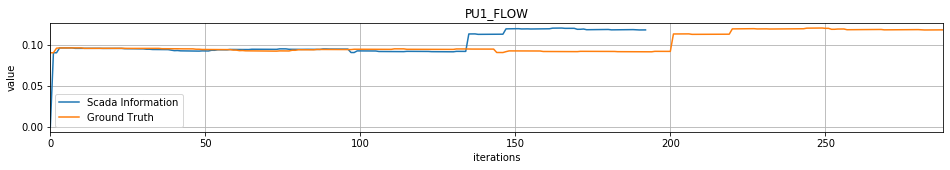

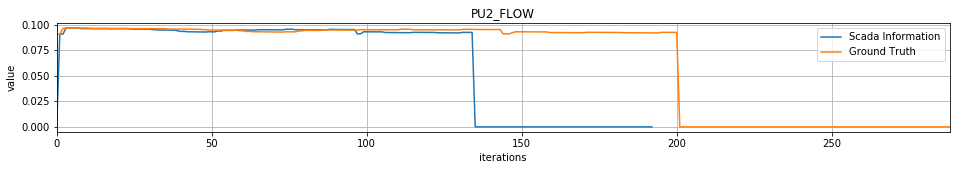

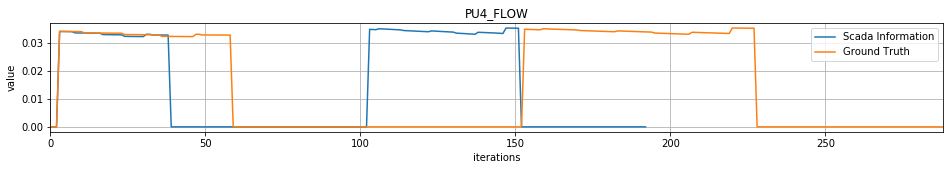

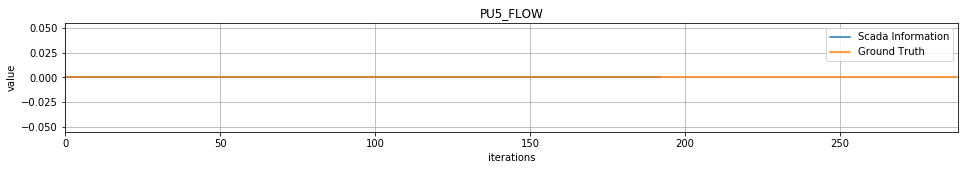

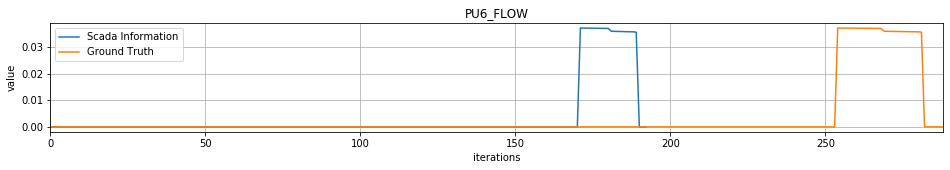

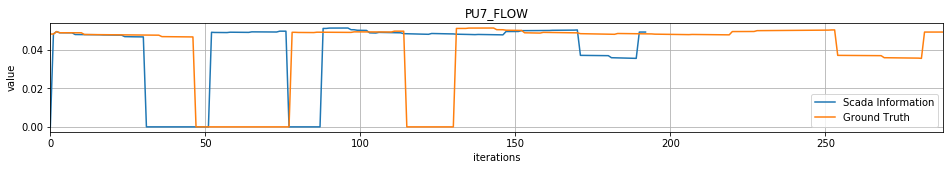

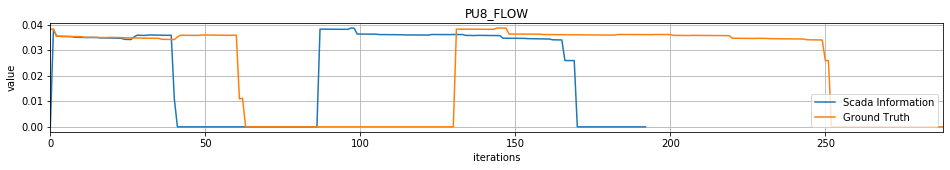

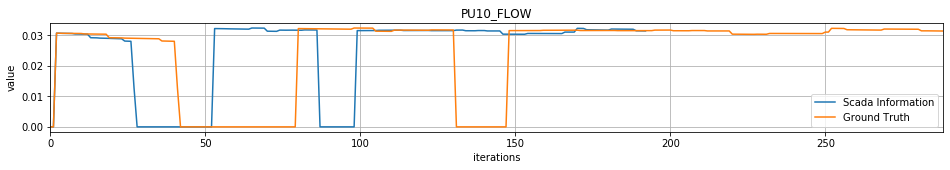

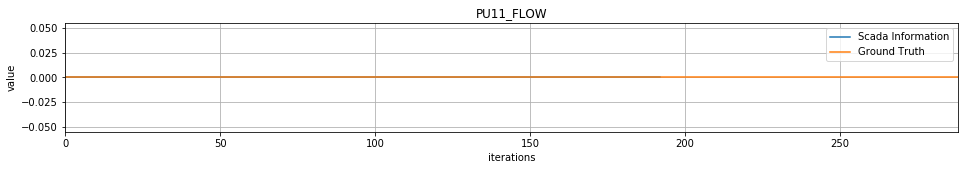

In [17]:
for column in scada_information.columns:
    if column.startswith('P') and column.endswith('F'):
        g_name = column[:-1]+'_FLOW' 
    else:        
        continue    
    do_plot([scada_information[column], ground_truth[g_name]],['Scada Information', 'Ground Truth'],g_name,['iterations', 'value'])